In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sioux lookout ca
kahului us
longyearbyen sj
kodiak us
muros es
north bend us
saint george bm
east london za
lebu cl
punta arenas cl
punta arenas cl
byron bay au
zhuhai cn
rikitea pf
kodiak us
vardo no
rizhao cn
lompoc us
cherskiy ru
atuona pf
khatanga ru
jashpurnagar in
corrente br
patancheru in
kruisfontein za
kodiak us
punta arenas cl
saint-philippe re
mar del plata ar
fortuna us
kapaa us
iqaluit ca
fantanele ro
kapaa us
vestmannaeyjar is
dikson ru
mao td
bengkulu id
ereymentau kz
kashan ir
carquefou fr
ahipara nz
bredasdorp za
longyearbyen sj
ushuaia ar
charlestown kn
belushya guba ru
lebu cl
puerto ayora ec
katobu id
ushuaia ar
chuy uy
ushuaia ar
yumen cn
cornwall ca
la puebla del rio es
fortuna us
chuy uy
mar del plata ar
upernavik gl
rikitea pf
hithadhoo mv
punta arenas cl
mataura pf
muros es
christchurch nz
port lincoln au
yellowknife ca
sakakah sa
khoy ir
bluff nz
andenes no
geraldton au
ushuaia ar
busselton au
severnyy ru
karratha au
roma au
bac lieu vn
smolenka ru
pirgos gr
t

carnarvon au
ixtapa mx
lagoa pt
kapaa us
cherskiy ru
mehran ir
trelew ar
ituni gy
brigantine us
taolanaro mg
albany au
east london za
aksay kz
hilo us
fairlie nz
faya td
puerto ayora ec
ushuaia ar
rikitea pf
severo-kurilsk ru
paamiut gl
puerto ayora ec
port elizabeth za
busselton au
souillac mu
dekalb us
bluff nz
butaritari ki
pitimbu br
the valley ai
yarim ye
kodiak us
jamestown sh
pitea se
hobyo so
sambava mg
teya ru
ostrovnoy ru
jamestown sh
faya td
nalut ly
esperance au
port alfred za
cockburn town bs
rocha uy
victoria sc
katsuura jp
kapaa us
malwan in
rio gallegos ar
mar del plata ar
amderma ru
ariguani co
busselton au
hervey bay au
puerto ayora ec
jamestown sh
mar del plata ar
tuktoyaktuk ca
hobart au
halifax ca
lata sb
gogrial sd
yellowknife ca
georgetown sh
pandaria in
teguise es
ushuaia ar
yokadouma cm
saint george bm
kodiak us
bluff nz
sikandarpur in
ushuaia ar
sola vu
teya ru
georgetown sh
dzhusaly kz
roma au
rikitea pf
ushuaia ar
carnarvon au
fortuna us
port blair in
lieksa

puerto ayora ec
havre-saint-pierre ca
viedma ar
waingapu id
san pedro ar
tual id
port blair in
vaini to
atuona pf
tsihombe mg
busselton au
punta arenas cl
laguna br
catamarca ar
jamestown sh
hobart au
laguna br
tasiilaq gl
pisco pe
labuhan id
rocha uy
norman wells ca


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [9]:
import requests
requests.__version__

'2.27.1'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sioux lookout
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | muros
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | byron bay
Processing Record 12 of Set 1 | zhuhai
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | rizhao
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | jashpurnagar
Processing Record 21 of Set 1 | corrente
Processing Record 22 of Set 1 | patancheru
Processing Record 23 of Set 1 | kruisfon

Processing Record 38 of Set 4 | mayumba
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | huron
Processing Record 41 of Set 4 | muyezerskiy
Processing Record 42 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 43 of Set 4 | leh
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | bambous virieux
Processing Record 46 of Set 4 | ukiah
Processing Record 47 of Set 4 | constitucion
Processing Record 48 of Set 4 | dharchula
Processing Record 49 of Set 4 | hilo
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | sarangani
Processing Record 2 of Set 5 | racine
Processing Record 3 of Set 5 | kaduy
Processing Record 4 of Set 5 | puerto cortes
City not found. Skipping...
Processing Record 5 of Set 5 | dumai
Processing Record 6 of Set 5 | guisa
Processing Record 7 of Set 5 | charters towers
Processing Record 8 of Set 5 | san joaquin
Processing Record 9 of Set 5 | taburi
City not found. Skipping...
Processing Record 10 of Set 5 

Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | sambava
Processing Record 33 of Set 8 | teya
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | esperance
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | rocha
Processing Record 38 of Set 8 | victoria
Processing Record 39 of Set 8 | malwan
City not found. Skipping...
Processing Record 40 of Set 8 | rio gallegos
Processing Record 41 of Set 8 | ariguani
Processing Record 42 of Set 8 | hervey bay
Processing Record 43 of Set 8 | halifax
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | gogrial
Processing Record 46 of Set 8 | pandaria
Processing Record 47 of Set 8 | teguise
Processing Record 48 of Set 8 | yokadouma
Processing Record 49 of Set 8 | sikandarpur
Processing Record 50 of Set 8 | port blair
Processing Record 1 of Set 9 | lieksa
Processing Record 2 of Set 9 | bambanglipuro
Processing Record 3 of Set 9 | genhe
Processing Record 4 of Set 9 | swelle

Processing Record 22 of Set 12 | inongo
Processing Record 23 of Set 12 | seybaplaya
Processing Record 24 of Set 12 | tyukhtet
Processing Record 25 of Set 12 | fomento
Processing Record 26 of Set 12 | karaul
City not found. Skipping...
Processing Record 27 of Set 12 | point pleasant
Processing Record 28 of Set 12 | tabialan
City not found. Skipping...
Processing Record 29 of Set 12 | lichtenburg
Processing Record 30 of Set 12 | bhinmal
Processing Record 31 of Set 12 | veinticinco de mayo
Processing Record 32 of Set 12 | ikalamavony
Processing Record 33 of Set 12 | bluefields
Processing Record 34 of Set 12 | oriental
Processing Record 35 of Set 12 | san francisco
Processing Record 36 of Set 12 | rapid valley
Processing Record 37 of Set 12 | pictou
Processing Record 38 of Set 12 | smithers
Processing Record 39 of Set 12 | panguna
Processing Record 40 of Set 12 | shimoda
Processing Record 41 of Set 12 | sorong
Processing Record 42 of Set 12 | mrirt
City not found. Skipping...
Processing Re

In [14]:
len(city_data)

560

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sioux Lookout,50.1001,-91.9170,-16.22,69,0,6.91,CA,2022-02-03 17:40:39
1,Kahului,20.8947,-156.4700,72.84,78,20,3.44,US,2022-02-03 17:40:39
2,Longyearbyen,78.2186,15.6401,15.64,67,0,2.30,SJ,2022-02-03 17:40:40
3,Kodiak,57.7900,-152.4072,38.71,93,100,14.97,US,2022-02-03 17:36:07
4,Muros,42.7762,-9.0603,57.24,86,100,6.67,ES,2022-02-03 17:40:40
5,North Bend,43.4065,-124.2243,44.15,77,85,2.33,US,2022-02-03 17:40:41
6,Saint George,37.1041,-113.5841,38.62,26,0,3.00,US,2022-02-03 17:39:22
7,East London,-33.0153,27.9116,68.94,94,75,9.22,ZA,2022-02-03 17:39:49
8,Lebu,-37.6167,-73.6500,64.92,78,90,12.97,CL,2022-02-03 17:40:42
9,Punta Arenas,-53.1500,-70.9167,50.02,53,0,9.22,CL,2022-02-03 17:40:03


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sioux Lookout,CA,2022-02-03 17:40:39,50.1001,-91.9170,-16.22,69,0,6.91
1,Kahului,US,2022-02-03 17:40:39,20.8947,-156.4700,72.84,78,20,3.44
2,Longyearbyen,SJ,2022-02-03 17:40:40,78.2186,15.6401,15.64,67,0,2.30
3,Kodiak,US,2022-02-03 17:36:07,57.7900,-152.4072,38.71,93,100,14.97
4,Muros,ES,2022-02-03 17:40:40,42.7762,-9.0603,57.24,86,100,6.67


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

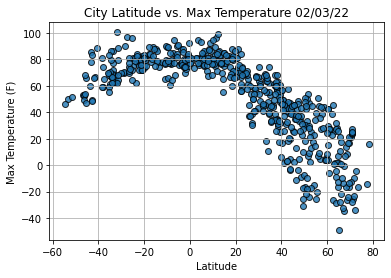

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

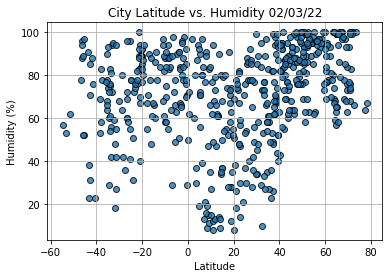

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

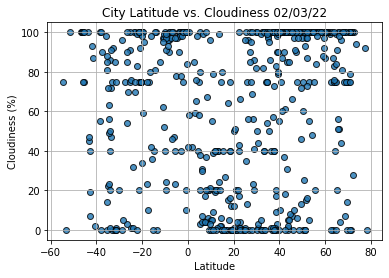

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

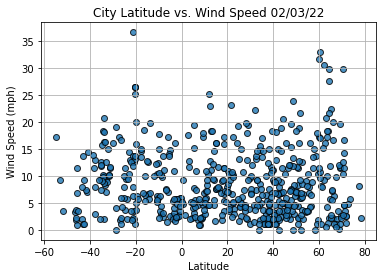

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
index13 = city_data_df.loc[13]
index13

City                        Vardo
Country                        NO
Date          2022-02-03 17:37:02
Lat                       70.3705
Lng                       31.1107
Max Temp                    21.18
Humidity                       93
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sioux Lookout,CA,2022-02-03 17:40:39,50.1001,-91.9170,-16.22,69,0,6.91
1,Kahului,US,2022-02-03 17:40:39,20.8947,-156.4700,72.84,78,20,3.44
2,Longyearbyen,SJ,2022-02-03 17:40:40,78.2186,15.6401,15.64,67,0,2.30
3,Kodiak,US,2022-02-03 17:36:07,57.7900,-152.4072,38.71,93,100,14.97
4,Muros,ES,2022-02-03 17:40:40,42.7762,-9.0603,57.24,86,100,6.67
...,...,...,...,...,...,...,...,...,...
547,Shimoda,JP,2022-02-03 17:51:06,34.6667,138.9500,39.11,58,99,7.67
549,Kutum,SD,2022-02-03 17:55:32,14.2000,24.6667,69.40,13,20,14.56
551,Porto Santo,PT,2022-02-03 17:55:33,33.0720,-16.3415,68.31,77,40,9.22
552,Santo Domingo,DO,2022-02-03 17:51:50,18.5001,-69.9886,80.24,67,40,11.50


In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sioux Lookout,CA,2022-02-03 17:40:39,50.1001,-91.9170,-16.22,69,0,6.91
1,Kahului,US,2022-02-03 17:40:39,20.8947,-156.4700,72.84,78,20,3.44
2,Longyearbyen,SJ,2022-02-03 17:40:40,78.2186,15.6401,15.64,67,0,2.30
3,Kodiak,US,2022-02-03 17:36:07,57.7900,-152.4072,38.71,93,100,14.97
4,Muros,ES,2022-02-03 17:40:40,42.7762,-9.0603,57.24,86,100,6.67


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

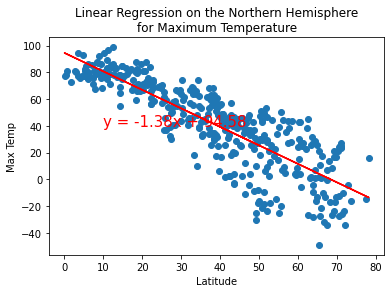

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

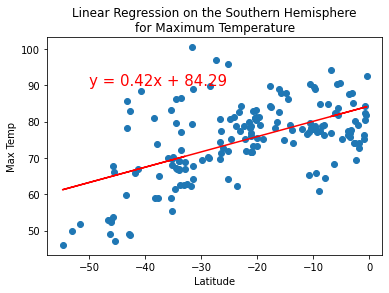

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

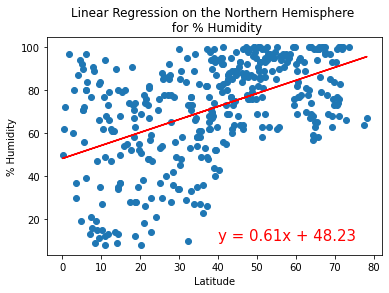

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

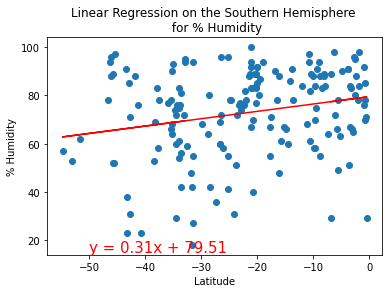

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

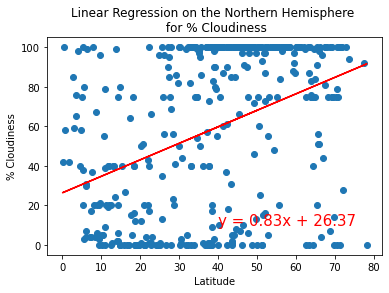

In [67]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

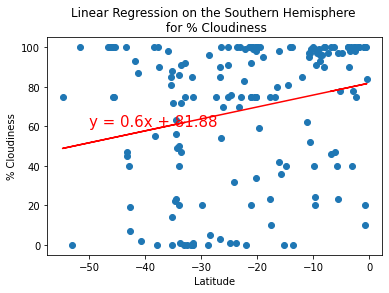

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [72]:
linregress(x_values, y_values)

LinregressResult(slope=0.603488056363461, intercept=81.87641702710368, rvalue=0.2366306727629129, pvalue=0.0018914486972828185, stderr=0.19117467478317604, intercept_stderr=4.975569357889963)